In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
math1=pd.read_csv('Maths.csv')

In [3]:
math1.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,10


In [4]:
math1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
math=math1.copy()

In [6]:
lister=math.dtypes==object
obj_cols=lister[lister==True].index.to_list()

In [7]:
le=LabelEncoder()
for col in obj_cols:
    math[col]=le.fit_transform(math[col])

In [8]:
math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,0,0,18,1,0,0,4,4,0,4,...,0,0,4,3,4,1,1,3,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,0,5,3,3,1,1,3,4,6
2,0,0,15,1,1,1,1,1,0,2,...,1,0,4,3,2,2,3,3,10,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,3,2,2,1,1,5,2,15
4,0,0,16,1,0,1,3,3,2,2,...,0,0,4,3,2,1,2,5,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,0,0,5,5,4,4,5,4,11,9
391,1,1,17,1,1,1,3,1,3,3,...,1,0,2,4,5,3,4,2,3,16
392,1,1,21,0,0,1,1,1,2,2,...,0,0,5,5,3,3,3,3,3,7
393,1,1,18,0,1,1,3,2,3,2,...,1,0,4,4,1,3,4,5,0,10


In [9]:
X=math.drop(columns='G3')
y=math.G3

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [14]:
# Using Decision Tree Regressor
np.random.seed(42)
dt=DecisionTreeRegressor()
params={'max_depth':[2,3,4,5,6,7,8,9,10],
       'min_samples_leaf':[3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20]}
dt_grid=GridSearchCV(dt,param_grid=params,cv=5,scoring='r2')
dt_grid.fit(X_train,y_train)
print('Score is ',dt_grid.score(X_train,y_train))
print('Best Params are ',dt_grid.best_params_)
from sklearn.metrics import mean_absolute_error as mae
preds=dt_grid.predict(X_test)
mae(preds,y_test)/y_test.median()

Score is  0.42060730155891757
Best Params are  {'max_depth': 8, 'min_samples_leaf': 13}


0.407988846888283

In [15]:
pd.DataFrame({'preds':preds,'Actuals':y_test}).head(5)

,preds,Actuals
78,8.500000,10
371,9.214286,12
248,10.105263,5
55,11.671429,10
390,8.500000,9


In [16]:
# Using Random forest Regressor
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
params={'max_depth':[4,5,6,7,8,9,10,11,12,13],
       'n_estimators':[2,4,6,8,10,12,14,16],
       'max_features':['sqrt','log2']}
rf_grid=GridSearchCV(rf,param_grid=params,cv=5,scoring='r2')
rf_grid.fit(X_train,y_train)
print('Score is ',rf_grid.score(X_train,y_train))
print('Best Params are ',rf_grid.best_params_)

Score is  0.4849369080991831
Best Params are  {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 16}


In [17]:
preds=rf_grid.predict(X_test)
res=pd.DataFrame({'preds':preds,'Actuals':y_test})
from sklearn.metrics import mean_absolute_error as mae
mae(preds,y_test)/y_test.median()


0.33819358988156023

In [31]:
discrete=X.dtypes==int

In [36]:
mi=mutual_info_regression(X,y,discrete_features=discrete)
series=pd.Series(mi,index=X.columns).sort_values(ascending=False)

In [38]:
series

failures      0.067986
Mjob          0.030841
Walc          0.029351
paid          0.028950
schoolsup     0.026734
famsize       0.025010
Medu          0.023456
nursery       0.022200
Fedu          0.020776
higher        0.017788
Dalc          0.000000
activities    0.000000
freetime      0.000000
famrel        0.000000
romantic      0.000000
internet      0.000000
health        0.000000
goout         0.000000
school        0.000000
famsup        0.000000
sex           0.000000
studytime     0.000000
traveltime    0.000000
guardian      0.000000
reason        0.000000
Fjob          0.000000
Pstatus       0.000000
address       0.000000
age           0.000000
absences      0.000000
dtype: float64

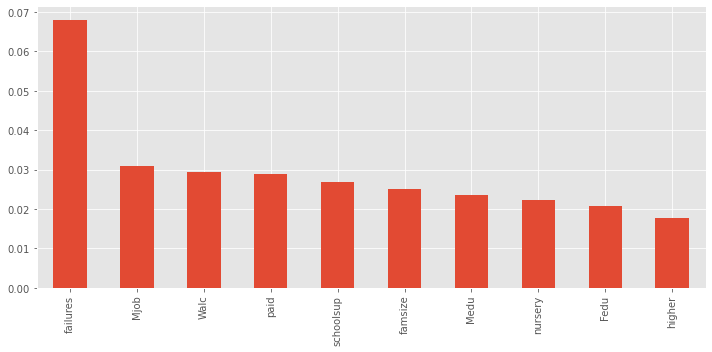

In [44]:
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
series.head(10).plot(kind='bar')
plt.tight_layout()
plt.savefig('feature_importances.jpeg')

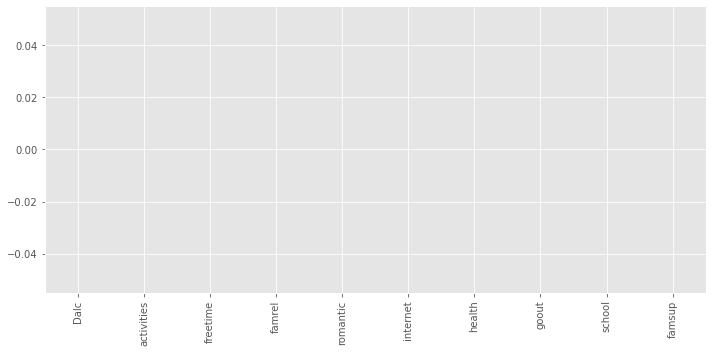

In [48]:
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
series.iloc[10:20].plot(kind='bar')
plt.tight_layout()
plt.savefig('feature_importances_tail.jpeg')

<AxesSubplot:xlabel='failures', ylabel='G3'>

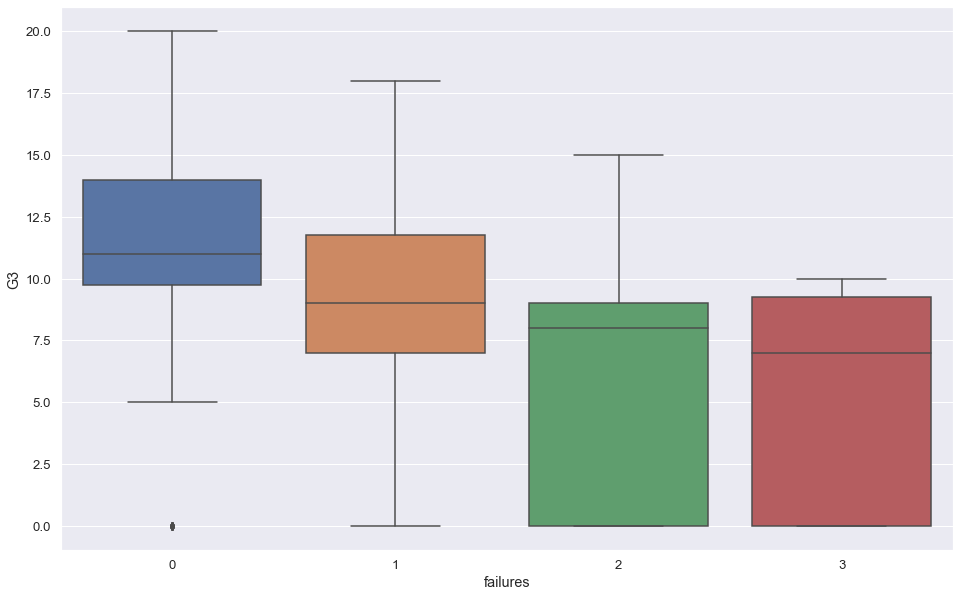

In [34]:
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(16,10)},font_scale=1.2)
sns.boxplot(y=math.G3,x=math.failures)

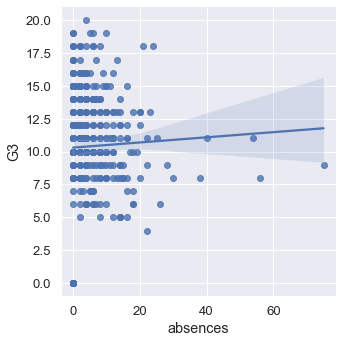

In [35]:
sns.lmplot(data=math,x='absences',y='G3')

<AxesSubplot:xlabel='Walc', ylabel='G3'>

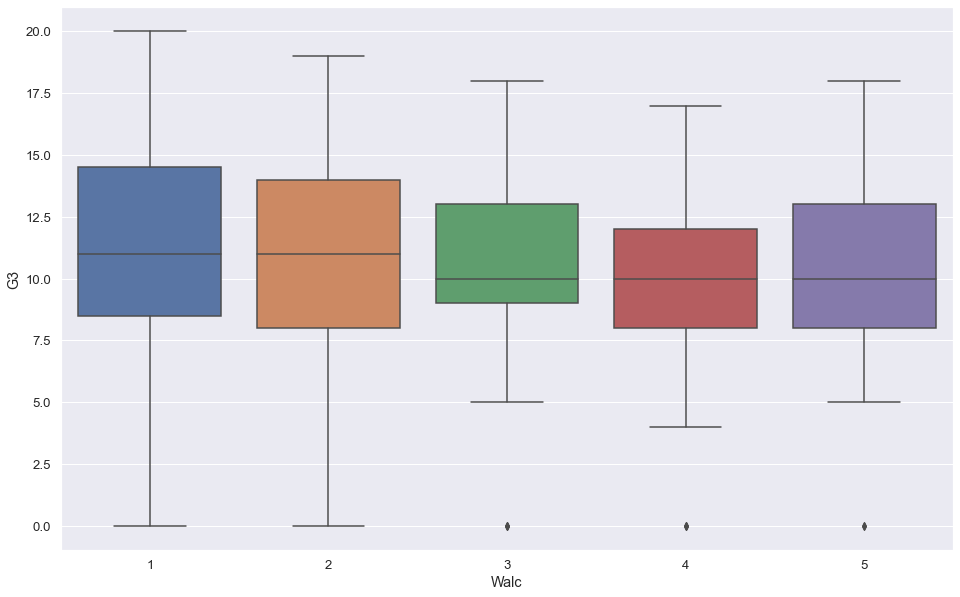

In [34]:
sns.set_theme(rc={'figure.figsize':(16,10)},font_scale=1.2)
sns.boxplot(y=math.G3,x=math.Walc)

<AxesSubplot:xlabel='Mjob', ylabel='G3'>

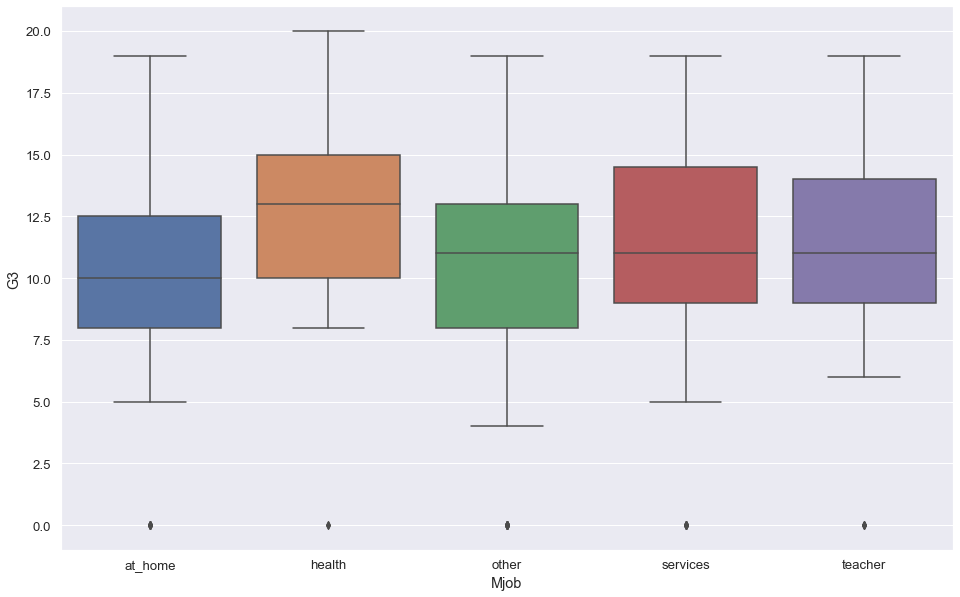

In [36]:
sns.set_theme(rc={'figure.figsize':(16,10)},font_scale=1.2)
sns.boxplot(y=math.G3,x=math1.Mjob)

In [26]:
math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,0,0,18,1,0,0,4,4,0,4,...,0,0,4,3,4,1,1,3,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,0,5,3,3,1,1,3,4,6
2,0,0,15,1,1,1,1,1,0,2,...,1,0,4,3,2,2,3,3,10,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,3,2,2,1,1,5,2,15
4,0,0,16,1,0,1,3,3,2,2,...,0,0,4,3,2,1,2,5,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,0,0,5,5,4,4,5,4,11,9
391,1,1,17,1,1,1,3,1,3,3,...,1,0,2,4,5,3,4,2,3,16
392,1,1,21,0,0,1,1,1,2,2,...,0,0,5,5,3,3,3,3,3,7
393,1,1,18,0,1,1,3,2,3,2,...,1,0,4,4,1,3,4,5,0,10
